In [2]:
import matplotlib.pyplot as plt
import torch
import random

import numpy as np
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view, head_view
from utils import *
from clustering import *
import json


c:\Users\johan\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\johan\anaconda3\envs\thesis\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [35]:
with open('pawsx_en_write_out_info.json', 'r', encoding="utf-8") as file:
    data = json.load(file)

prompt= "The cat wears a hat, right? Yes, it does"

def get_attention(prompt, model=model, tokenizer=tokenizer, first_token=True):
    inputs = tokenizer.encode(prompt, return_tensors='pt')#.to(device)
    tokens = tokenizer.convert_ids_to_tokens(inputs[0])
    with torch.no_grad():
        outputs = model(inputs) 
        attention = outputs[-1]
    if not first_token:
        attention = delete_first_token(attention)    
    return attention, tokens

attention, tokens = get_attention(prompt)    
cluster_map = clustering(attention)

def get_attention_for_head(attention, layer, head):
   return attention[layer][0, head] 
    

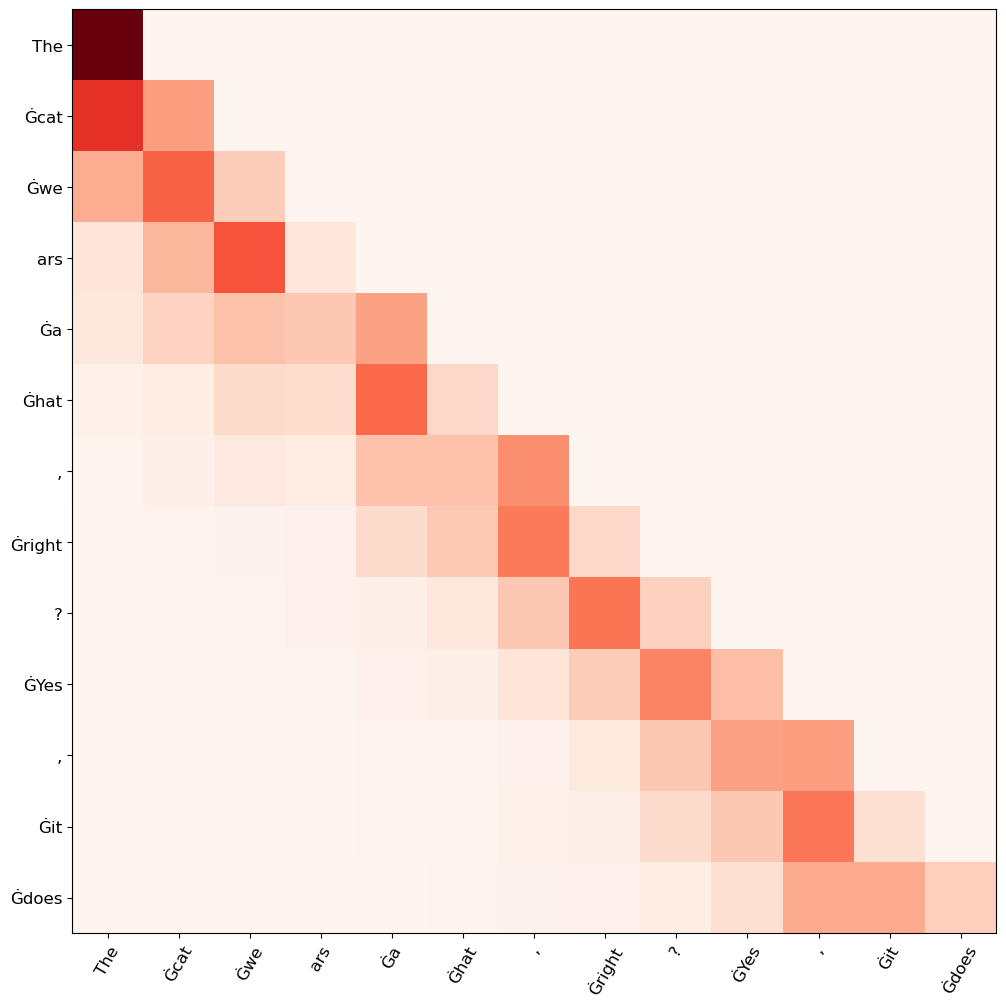

In [38]:
head_attention = get_attention_for_head(attention, 0, 0)
head_attention.shape
visualize_single(head_attention, tokens, "stuff")

In [3]:
cluster_groups = sample_heads_from_clusters(cluster_map, n=8)

In [ ]:
for group in cluster_groups:     
    visualize_some(attention, tokens, group)

In [3]:
print(model.config.n_head)
print(model.config.hidden_size)

16
1024


In [4]:
model.h[0].self_attention.query_key_value.weight.shape

torch.Size([3072, 1024])

In [6]:
attention_weight = model.h[0].self_attention.query_key_value.weight
hidden_size = model.config.hidden_size
n_head = model.config.n_head
attention_weight = attention_weight.view(hidden_size, 3, n_head, hidden_size//n_head)
# hiddensize, 3, n_head, head size
# query key value 
attention_weight.shape


torch.Size([1024, 3, 16, 64])

In [25]:
with torch.no_grad():
    zero_head = torch.zeros(attention_weight.shape[0], 3, attention_weight.shape[3])
    attention_weight[:,:,0,:] = zero_head


True

In [22]:
zero_head.shape

torch.Size([1024, 3, 64])

In [39]:
def get_attention_weights(model,layer,head):
    
    bloomblock = model.h[layer]
    attention_weight = bloomblock.self_attention.query_key_value.weight
    hidden_size = model.config.hidden_size
    n_head = model.config.n_head
    hidden_size = model.config.hidden_size
    # hiddensize, 3, n_head, head size
    # query key value 
    attention_weight = attention_weight.view(hidden_size, 3, n_head, hidden_size//n_head)
    
    head_attention = attention_weight[:,:,head,:]
    return head_attention
    

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], grad_fn=<SliceBackward0>)

In [22]:
model.h[0].self_attention.query_key_value.weight.shape
# .self_attention.query_key_value

torch.Size([3072, 1024])

In [24]:
t = tokenizer.encode("test prompt", return_tensors='pt')

In [28]:
t[0]

tensor([ 9234, 39841])

In [31]:
for name, parameter in model.named_parameters():
        param = parameter.numel()
        print(name, param)

word_embeddings.weight 256901120
word_embeddings_layernorm.weight 1024
word_embeddings_layernorm.bias 1024
h.0.input_layernorm.weight 1024
h.0.input_layernorm.bias 1024
h.0.self_attention.query_key_value.weight 3145728
h.0.self_attention.query_key_value.bias 3072
h.0.self_attention.dense.weight 1048576
h.0.self_attention.dense.bias 1024
h.0.post_attention_layernorm.weight 1024
h.0.post_attention_layernorm.bias 1024
h.0.mlp.dense_h_to_4h.weight 4194304
h.0.mlp.dense_h_to_4h.bias 4096
h.0.mlp.dense_4h_to_h.weight 4194304
h.0.mlp.dense_4h_to_h.bias 1024
h.1.input_layernorm.weight 1024
h.1.input_layernorm.bias 1024
h.1.self_attention.query_key_value.weight 3145728
h.1.self_attention.query_key_value.bias 3072
h.1.self_attention.dense.weight 1048576
h.1.self_attention.dense.bias 1024
h.1.post_attention_layernorm.weight 1024
h.1.post_attention_layernorm.bias 1024
h.1.mlp.dense_h_to_4h.weight 4194304
h.1.mlp.dense_h_to_4h.bias 4096
h.1.mlp.dense_4h_to_h.weight 4194304
h.1.mlp.dense_4h_to_h.bia

In [1]:
model

NameError: name 'model' is not defined